<a href="https://colab.research.google.com/github/DanieleScal99/MLPNS_DScalabrini/blob/main/DScalabrini_higgsbosonSearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np
import pylab as pl
import os
import json
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


- Download the Higgs boson data from Kaggle (programmatically within the notebook)
see how I did it in the Titanic Trees notebook https://github.com/fedhere/DSPS/blob/master/lab9/titanictree.ipynb

find the correct API link here https://www.kaggle.com/c/higgs-boson/data

Data Dictionary (Dataset semantics) http://opendata.cern.ch/record/328


In [25]:
pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
cd drive/MyDrive/


[Errno 2] No such file or directory: 'drive/MyDrive/'
/content/drive/MyDrive/MLPNS_2023/kaggleHiggs


In [27]:
ls kaggle.json


kaggle.json


In [28]:
!chmod 600 kaggle.json

In [29]:

envs = json.load(open("kaggle.json", "r"))
os.environ["KAGGLE_USERNAME"] = envs['username']
os.environ["KAGGLE_KEY"] = envs['key']

In [30]:
cd MLPNS_2023

[Errno 2] No such file or directory: 'MLPNS_2023'
/content/drive/MyDrive/MLPNS_2023/kaggleHiggs


In [31]:
cd kaggleHiggs

[Errno 2] No such file or directory: 'kaggleHiggs'
/content/drive/MyDrive/MLPNS_2023/kaggleHiggs


In [32]:
!kaggle competitions download -c higgs-boson

 90% 49.0M/54.3M [00:00<00:00, 79.2MB/s]
100% 54.3M/54.3M [00:00<00:00, 78.0MB/s]


In [33]:
ls

higgs-boson.zip  kaggle.json


In [34]:
!unzip higgs-boson.zip

Archive:  higgs-boson.zip
  inflating: HiggsBosonCompetition_AMSMetric_rev1.py  
  inflating: random_submission.zip   
  inflating: test.zip                
  inflating: training.zip            


In [35]:
!unzip test.zip
!unzip training.zip


Archive:  test.zip
  inflating: test.csv                
Archive:  training.zip
  inflating: training.csv            



- Read in the trainind data. Split the provided training data into a training and a test set. 
The last 2 columns are what you want to predict: "weight" and "label".
Remove them from the input data and create a separate variable label and a separate variable weight, which will be your target variables for, respectively, classification and regression.



In [36]:
higgsdata=pd.read_csv('training.csv')
higgsdata.shape

(250000, 33)

In [37]:
higgsdata.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


In [38]:
higgsdata.describe()
higgsdata=higgsdata.replace(-999, np.nan)
higgsdata=higgsdata.dropna()
(higgsdata==-999).sum()

EventId                        0
DER_mass_MMC                   0
DER_mass_transverse_met_lep    0
DER_mass_vis                   0
DER_pt_h                       0
DER_deltaeta_jet_jet           0
DER_mass_jet_jet               0
DER_prodeta_jet_jet            0
DER_deltar_tau_lep             0
DER_pt_tot                     0
DER_sum_pt                     0
DER_pt_ratio_lep_tau           0
DER_met_phi_centrality         0
DER_lep_eta_centrality         0
PRI_tau_pt                     0
PRI_tau_eta                    0
PRI_tau_phi                    0
PRI_lep_pt                     0
PRI_lep_eta                    0
PRI_lep_phi                    0
PRI_met                        0
PRI_met_phi                    0
PRI_met_sumet                  0
PRI_jet_num                    0
PRI_jet_leading_pt             0
PRI_jet_leading_eta            0
PRI_jet_leading_phi            0
PRI_jet_subleading_pt          0
PRI_jet_subleading_eta         0
PRI_jet_subleading_phi         0
PRI_jet_al

In [39]:
labels=higgsdata[['Label']]
labels

,Label
0,s
5,b
6,s
11,b
23,s
...,...
249976,s
249980,s
249985,s
249993,s


In [40]:
weights=higgsdata[['Weight']]
weights

,Weight
0,0.002653
5,0.083414
6,0.002653
11,0.307170
23,0.001503
...,...
249976,0.001503
249980,0.018636
249985,0.018636
249993,0.001503


<ipython-input-41-0d716edefdf6>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  pl.figure()


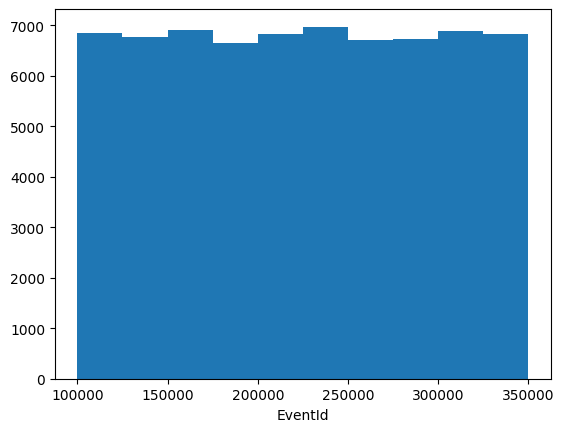

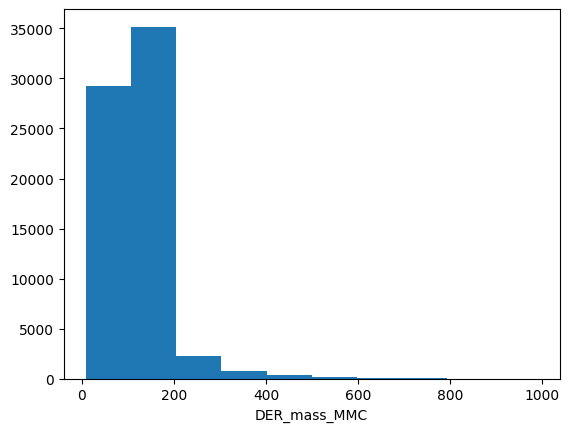

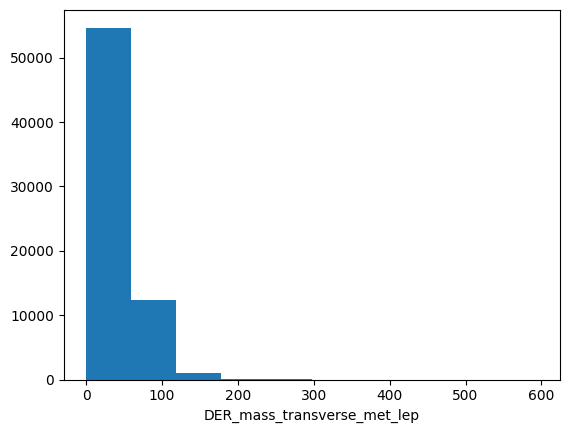

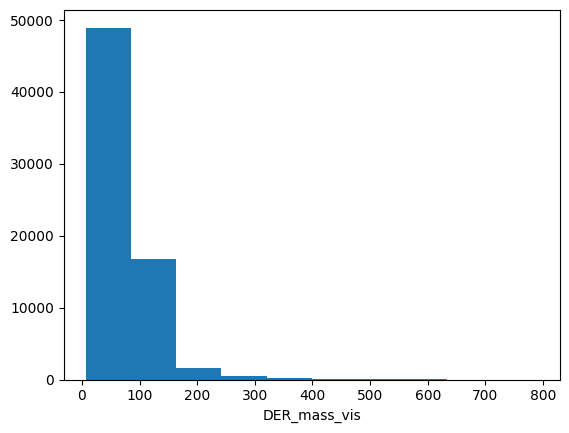

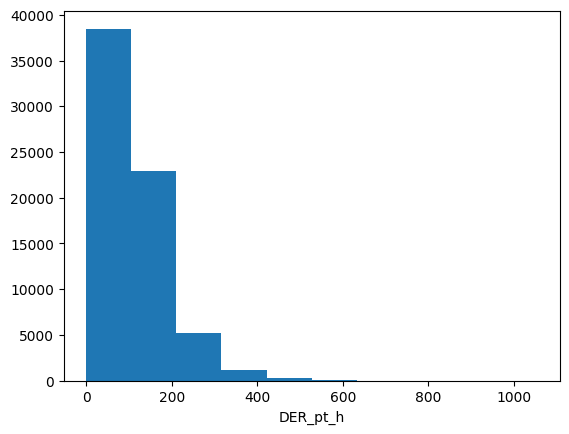

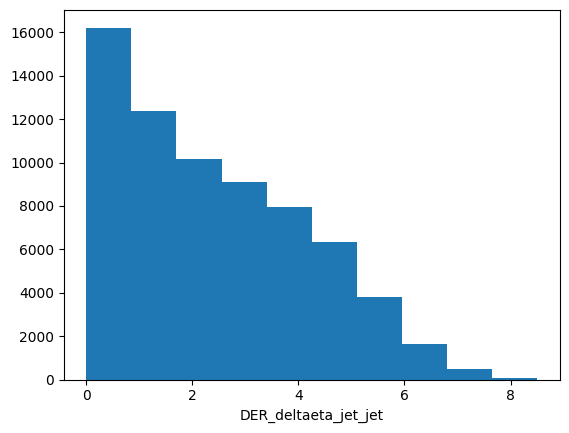

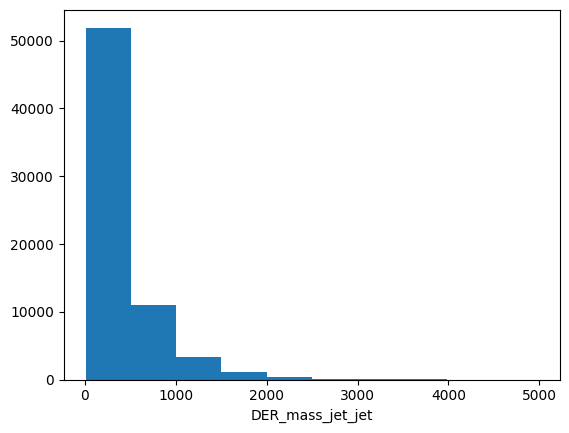

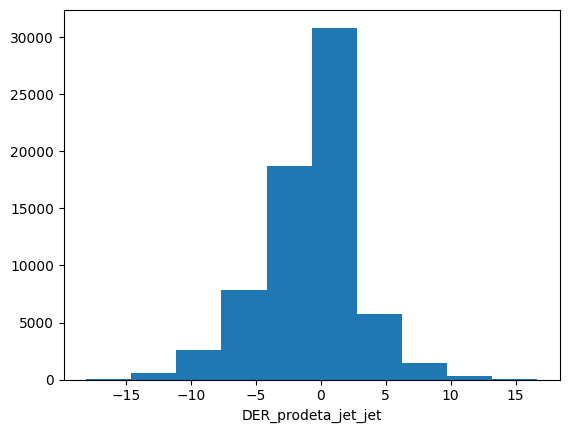

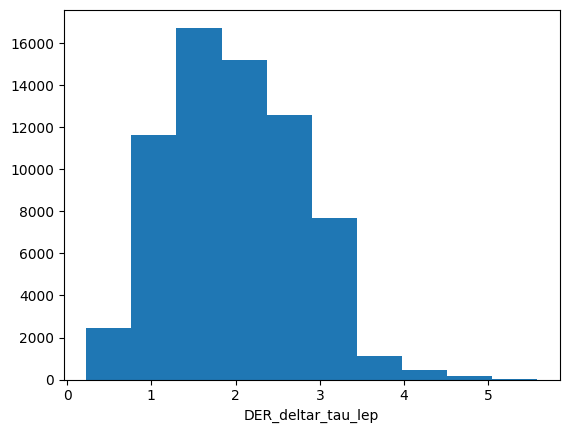

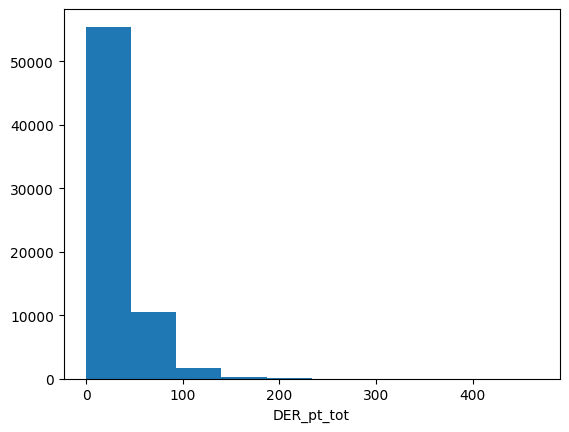

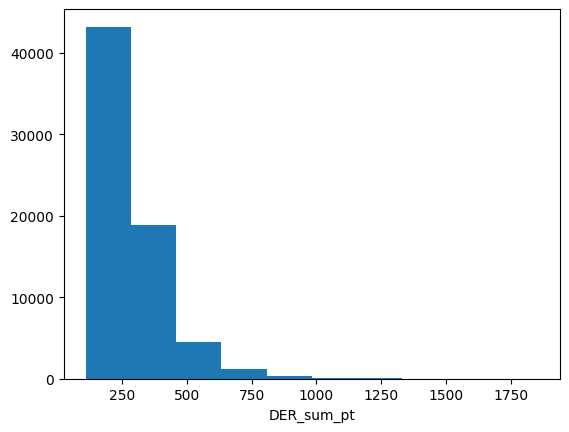

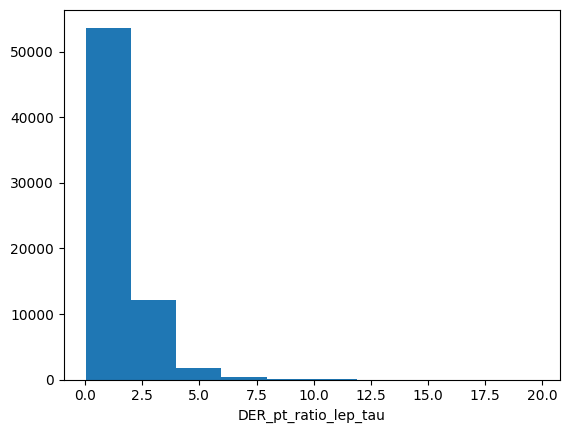

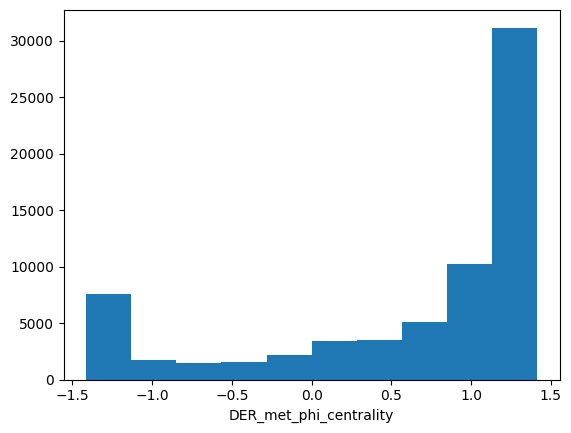

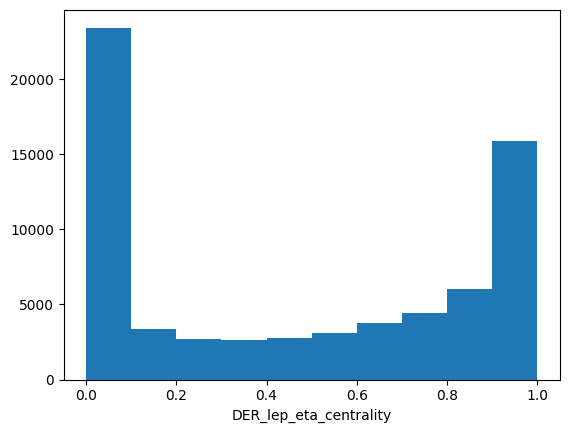

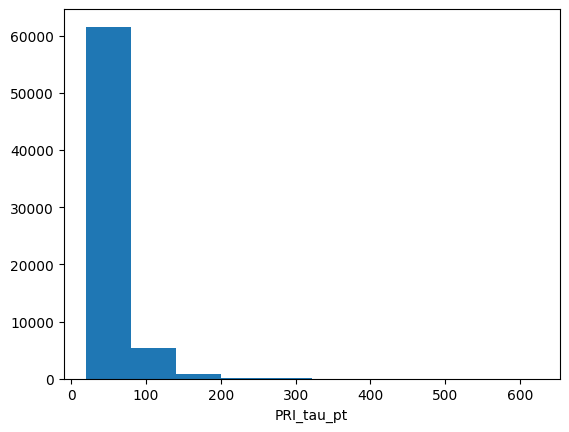

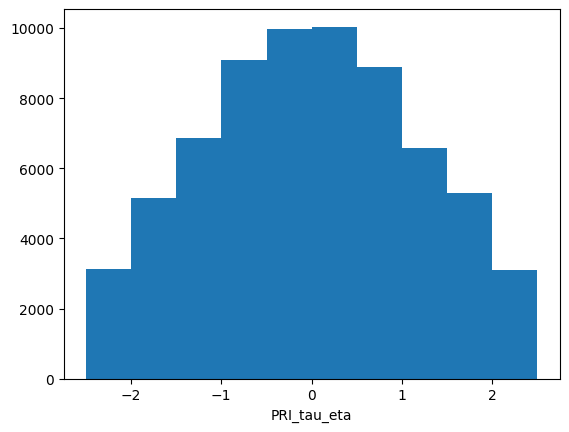

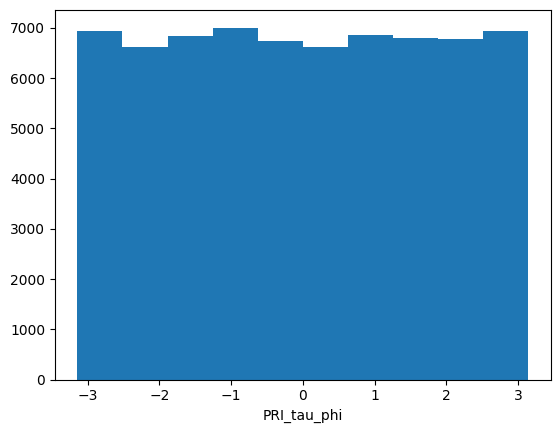

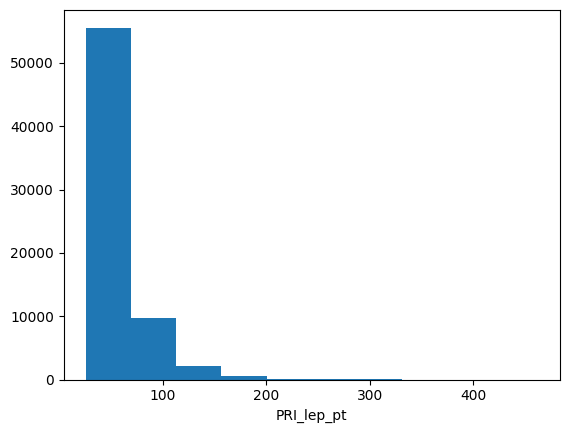

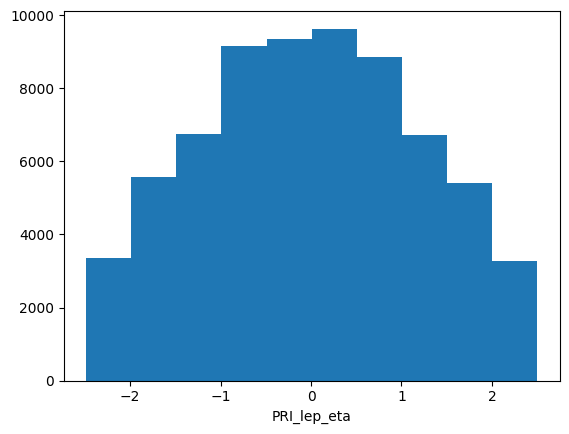

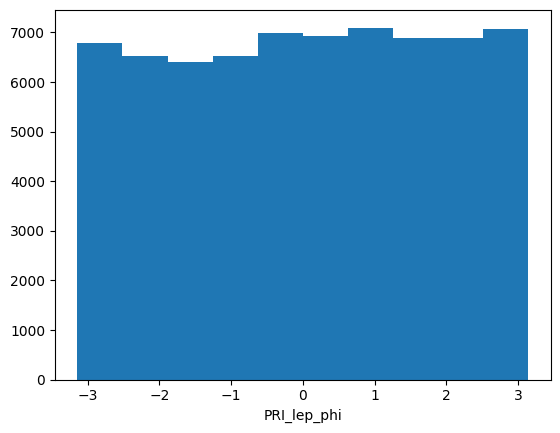

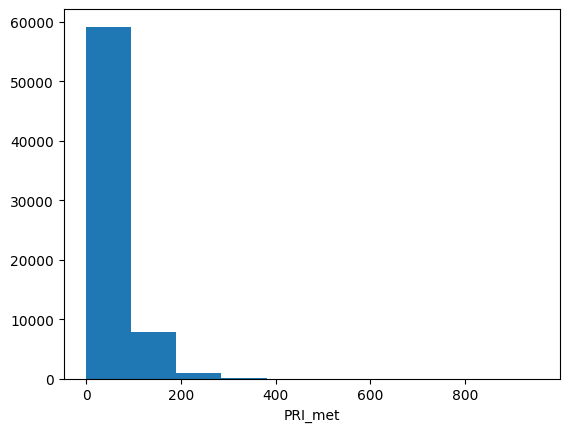

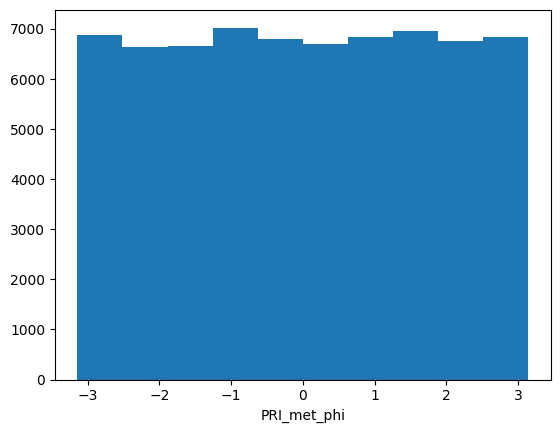

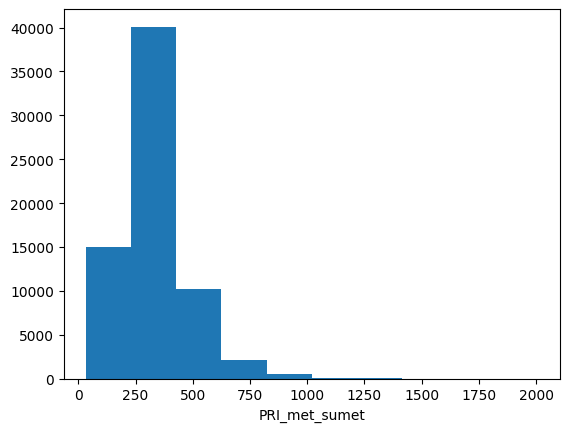

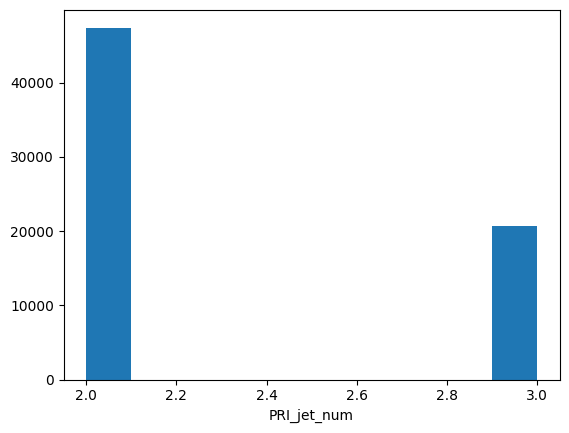

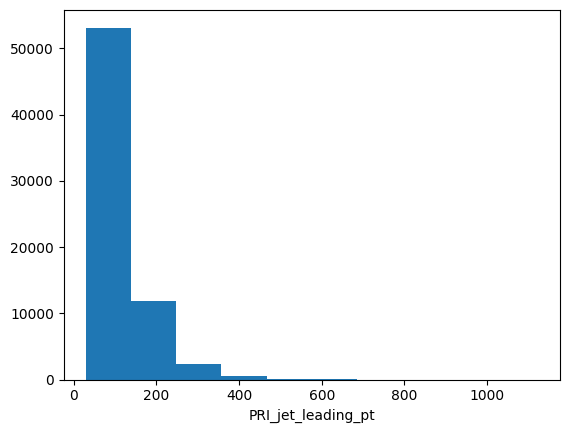

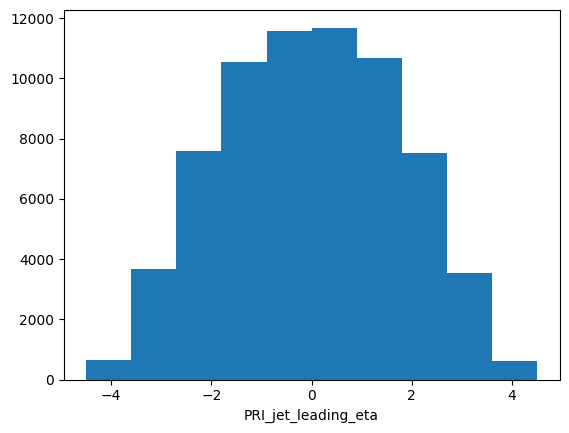

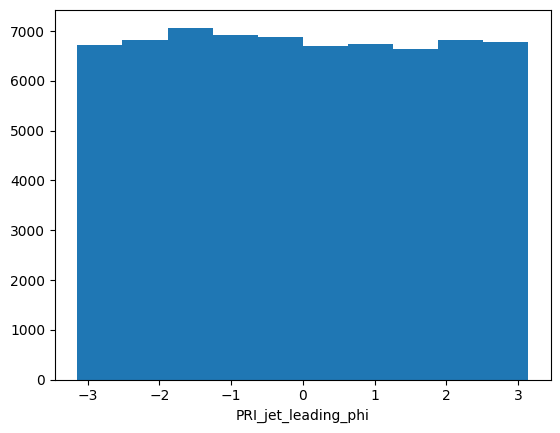

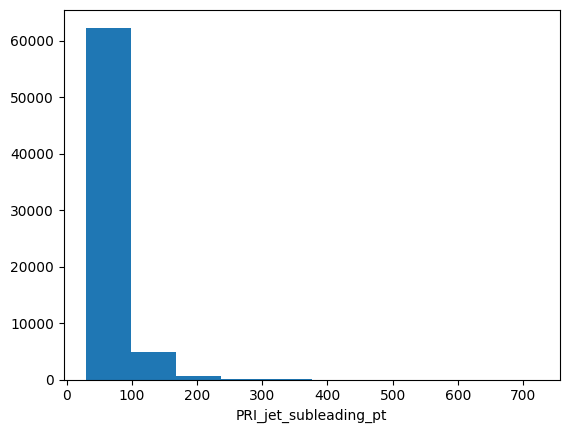

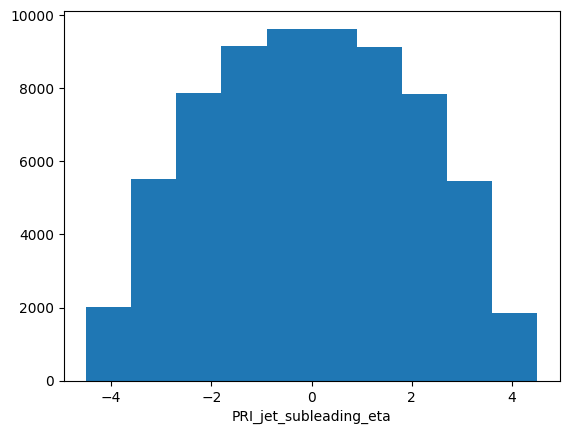

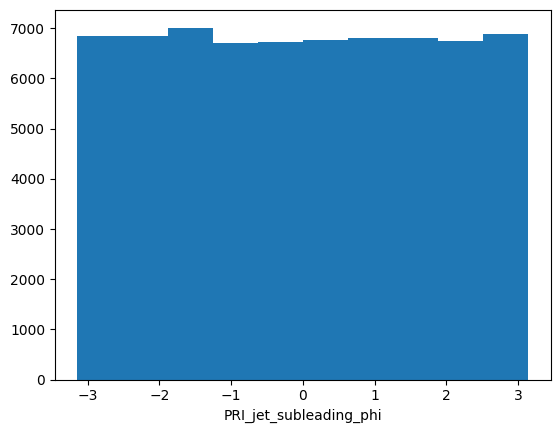

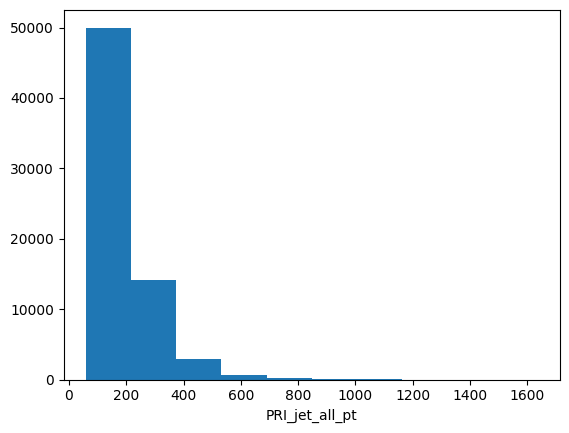

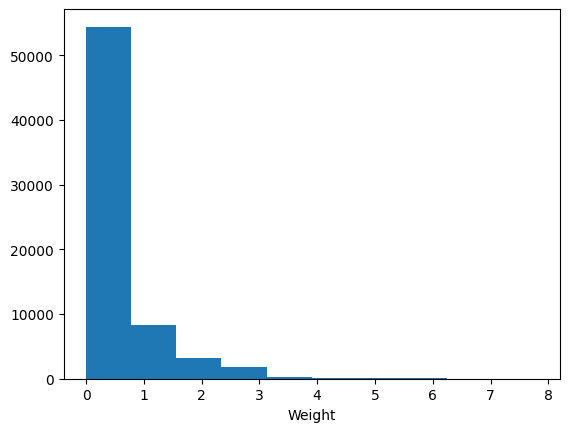

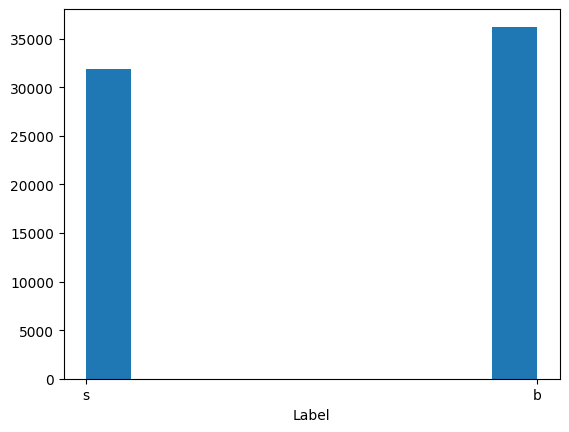

In [41]:
for c in higgsdata.columns:
  pl.figure()
  pl.hist(higgsdata[c])
  pl.xlabel(c)

In [42]:
(higgsdata==-999).sum()

EventId                        0
DER_mass_MMC                   0
DER_mass_transverse_met_lep    0
DER_mass_vis                   0
DER_pt_h                       0
DER_deltaeta_jet_jet           0
DER_mass_jet_jet               0
DER_prodeta_jet_jet            0
DER_deltar_tau_lep             0
DER_pt_tot                     0
DER_sum_pt                     0
DER_pt_ratio_lep_tau           0
DER_met_phi_centrality         0
DER_lep_eta_centrality         0
PRI_tau_pt                     0
PRI_tau_eta                    0
PRI_tau_phi                    0
PRI_lep_pt                     0
PRI_lep_eta                    0
PRI_lep_phi                    0
PRI_met                        0
PRI_met_phi                    0
PRI_met_sumet                  0
PRI_jet_num                    0
PRI_jet_leading_pt             0
PRI_jet_leading_eta            0
PRI_jet_leading_phi            0
PRI_jet_subleading_pt          0
PRI_jet_subleading_eta         0
PRI_jet_subleading_phi         0
PRI_jet_al

In [43]:
higgsdata=higgsdata.drop(["Weight","Label"],axis=1)

In [44]:
higgsdata.describe()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
count,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,...,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000
mean,225035.224154,122.816184,35.270300,78.496815,111.430393,2.434232,378.176455,-0.881020,1.996525,27.356644,...,0.006987,334.677667,2.303711,106.879969,-0.005791,-0.011564,57.915426,-0.012930,-0.004782,183.374631
std,72243.940540,60.751559,30.750262,40.728784,76.318688,1.750700,400.784254,3.592624,0.774636,28.266913,...,1.813892,139.867044,0.459863,68.165852,1.746442,1.809276,32.224318,2.044065,1.817247,108.312736
min,100000.000000,9.878000,0.000000,7.330000,0.120000,0.000000,13.602000,-18.066000,0.228000,0.004000,...,-3.142000,34.323000,2.000000,30.196000,-4.497000,-3.142000,30.000000,-4.500000,-3.142000,60.223000
25%,162349.750000,93.320250,11.320000,57.274250,57.827000,0.897000,113.463000,-2.729000,1.397000,4.218000,...,-1.550000,239.168250,2.000000,60.844500,-1.339000,-1.574000,37.392250,-1.628750,-1.579000,109.472000
50%,225288.000000,113.230000,26.964000,70.930000,94.714000,2.146500,232.370500,-0.284000,1.940000,22.542000,...,0.005000,305.170000,2.000000,87.369000,0.000000,-0.032000,48.105500,-0.014000,-0.008000,154.136500
75%,287772.750000,133.455750,52.202750,88.372000,145.824750,3.741000,489.447750,0.921000,2.574000,39.067750,...,1.573000,396.382500,3.000000,131.069000,1.330000,1.558000,66.946500,1.604000,1.573000,223.595250
max,349994.000000,988.199000,594.287000,789.538000,1053.807000,8.503000,4974.979000,16.648000,5.579000,466.525000,...,3.142000,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000


In [45]:
# leave
from sklearn.model_selection import train_test_split 
train_test_split?

- Use a Random Forest and a Gradiend Boosted Tree Classifier model to predict the label of the particles. get the score of the model on the training and test set and comment on the result for each model.


In [46]:
traindata, testdata, train_label, test_label=train_test_split(higgsdata.values, labels, test_size=0.2, train_size=0.2)

In [47]:
#leave 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification

# Look at parameters used by our current forest
rf = RandomForestClassifier(random_state = 222)
print('Parameters currently in use:\n')
print(rf.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 222, 'verbose': 0, 'warm_start': False}


In [48]:
gbt = GradientBoostingClassifier(random_state=222)

In [49]:
rf_fit = rf.fit(traindata, train_label)
gbt_fit = gbt.fit(traindata, train_label)

<ipython-input-49-7324500ed116>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_fit = rf.fit(traindata, train_label)
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


calculate the  scores for the training and test sets and evaluate  overtraining etc

In [50]:
gbt.score(testdata,test_label)

0.839022241796961

In [51]:
rf.score(testdata,test_label)

0.8410041841004184

- Produce a confusion matrix for each model and compare them


 



In [52]:

# I creaded this function (mostly copied from sklearn examples). 
# You can use it to create the confusion matrix
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_true, y_pred,
                          normalize=False,
                          title='',
                          cmap=pl.cm.bone):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """         
    if normalize:
          title = title + ' Normalized confusion matrix'
    else:
          title = title + ' Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # plot it
    fig, ax = plt.subplots(1, 1)
    fig.subplots_adjust()
    im = ax.imshow(cm, cmap=cmap)
    ax_divider = make_axes_locatable(ax)
    # add an axes to the right of the main axes.
    pl.xticks([0, 1], labels=["N", "P"])
    pl.ylim(-0.5,1.5)
    pl.yticks([0,1], labels=["N", "P"])    
    pl.title(title)
    cax = ax_divider.append_axes("right", size="10%", pad="2%")
    cb = colorbar(im, cax=cax)
    

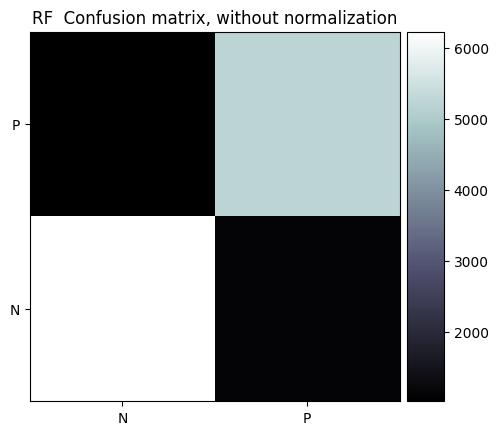

In [60]:
plot_confusion_matrix(rf.predict(testdata), test_label, 
                      title="RF ")

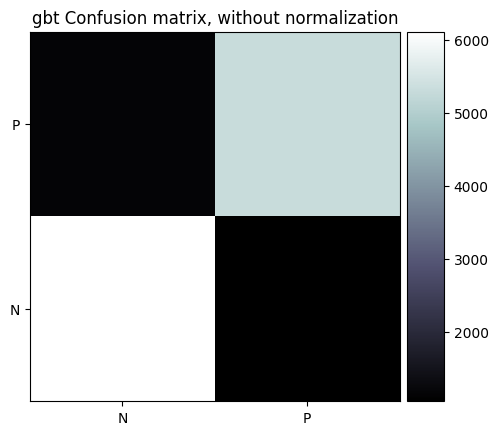

In [61]:
plot_confusion_matrix(gbt.predict(testdata), 
                      test_label,
                      title="gbt")


- Use a Random Forest and a Gradiend Boosted Tree Regressor model to predict the weight of the particles. Compare the model performance on training and test setsm


In [63]:
traindata_weights, testdata_weights, train_weights, test_weights = train_test_split(higgsdata.values, weights, test_size=0.2, train_size=0.2,stratify=labels)

In [71]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
rfR = RandomForestRegressor(n_estimators=100, max_depth=3,
                                  random_state=222)
rfR = RandomForestRegressor(n_estimators=100, max_depth=3,
                                  random_state=222)
rfR.fit(traindata_weights,train_weights)
gbtR = GradientBoostingRegressor(random_state=222)
gbtR.fit(traindata_weights,train_weights)
     


<ipython-input-71-c93e15b84997>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfR.fit(traindata_weights,train_weights)
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(random_state=222)

 Calculate the L2 and L1 loss functions for the fitted regression models (see slides for the definition) and discuss the results

In [83]:
pred_rf_w = rfR.predict(traindata_weights)
pred_gbt_w = gbtR.predict(traindata_weights)
l1_rf = np.abs(pred_rf_w.reshape(13622,1)-train_weights).sum()
l1_gbt = np.abs(pred_gbt_w.reshape(13622,1)-train_weights).sum()
l2_rf = pow(pred_rf_w.reshape(13622,1)-train_weights,2).sum()
l2_gbt = pow(pred_gbt_w.reshape(13622,1)-train_weights,2).sum()

print('l1_rf è:')
print(l1_rf);
print('l1_gbt è: ')
print(l1_gbt);
print('l2_rf è:')
print(l2_rf);
print('l2_gbt è: ')
print(l2_gbt);
print("Per entrambe le metriche GBT risulta migliore di RF")

l1_rf è:
Weight    5598.041823
dtype: float64
l1_gbt è: 
Weight    4579.594546
dtype: float64
l2_rf è:
Weight    5287.482199
dtype: float64
l2_gbt è: 
Weight    3671.844481
dtype: float64
Per entrambe le metriche GBT risulta migliore di RF


- For the Random Forest classifier, find the 4 most important features based on the simple unoptimized model you created earlier on. Use the documentation to find out what they are. We have not talked abotu the physics of this problem at all but the Kaggle challenge description should provide enogh information for you to comment on this result is somewhat superficially.

You can use ```rf.feature_importance_``` on the trained model to extract the relative importance of each feature (a number from 0 to 1) and then choose the features that have the 4 highest numbers (the numpy function ```argsort()``` is helpful here!)

Explore the parameter space with the sklearn module ```sklearn.model_selection.RandomizedSearchCV``` *fitting only those 4 features*

Follow this example to set up the parameter search. Set the estimators to 10 and 100, (the number of trees) and the max depth to 3, and 10, and None (let it be unconstrained). Set bootstrap to both True and False. Set the number of features to consider at every split to both "autp" and "sqrt". Use ```pprint``` like I did earlier in this notebook to print the parameters set

**this takes some computational time! so do not start this at the last minute!!**

 



In [84]:
pprint(random_grid)


Pretty printing has been turned ON


 mine and your best features do not necessarily have to be the same because our models may be different (different parameters, different random seed etc)

(array([20.,  7.,  2.,  1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.010545  , 0.02914032, 0.04773565, 0.06633098, 0.08492631,
        0.10352164, 0.12211696, 0.14071229, 0.15930762, 0.17790295,
        0.19649828]),
 <BarContainer object of 10 artists>)

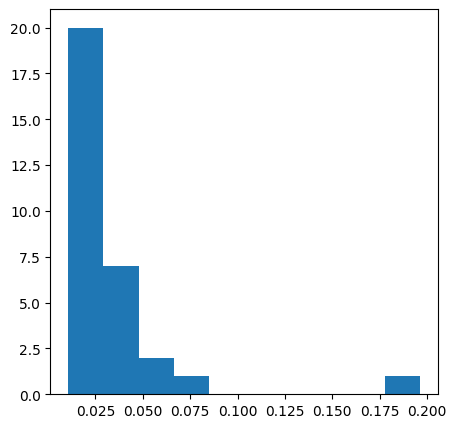

In [86]:
pl.hist(rf.feature_importances_)

In [88]:
best_features_index = np.argsort(rf.feature_importances_)[0:4]

In [89]:
higgsdata.iloc[:, best_features_index]

,PRI_jet_num,PRI_met_phi,PRI_lep_phi,PRI_tau_phi
0,2,-0.277,-2.414,0.381
5,3,2.237,1.857,1.329
6,2,-1.443,-0.966,2.409
11,3,2.148,2.502,-0.342
23,2,-0.973,-0.952,-1.506
...,...,...,...,...
249976,2,1.408,1.503,-0.013
249980,2,1.116,-1.558,0.823
249985,2,-2.575,-3.050,2.239
249993,3,-1.768,-1.689,1.348


In [91]:
from sklearn.model_selection import RandomizedSearchCV

In [93]:
random_grid = {'max_depth': [3, 10, None],
 'max_features': ['auto', 'sqrt'],
 'n_estimators': [10, 100, 1000]}

random_search = RandomizedSearchCV(estimator = rf, param_distributions=random_grid,
                                   n_iter=1, cv=3)



In [95]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
# Random search of parameters, using 3 fold cross validation, 
# search across 18 different combinations



Note that this may take a long time! It took 1 hour for me to run this. Dont start at the last minute!!

In [94]:
random_search.fit(traindata,train_label)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d a

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=222),
                   n_iter=1,
                   param_distributions={'max_depth': [3, 10, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [10, 100, 1000]})

In [96]:

print("Tuned RF  Parameters: {}".format(random_search.best_params_))
print("Best score is {}".format(random_search.best_score_
))


Tuned RF  Parameters: {'n_estimators': 1000, 'max_features': 'sqrt', 'max_depth': 10}
Best score is 0.834018298284742


In [97]:
df = pd.DataFrame(random_search.cv_results_)


In [98]:
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,41.980269,0.637022,0.702525,0.017571,1000,sqrt,10,"{'n_estimators': 1000, 'max_features': 'sqrt',...",0.834398,0.83638,0.831278,0.834018,0.0021,1


# Plot a simple 3-point ROC curve for the model with the best parameters found in the previous step. Describe it. 

In [101]:
rf.fit(traindata, train_label.values.flatten()=="s", max_depth,rf.predict(y_pred_grd_rfcat))

NameError: ignored

In [100]:
# The random forest model by itself
from sklearn.metrics import roc_curve
y_pred_grd_rfcat = rf.predict_proba(testdata)[:, 1]

fpr_rf, tpr_rf, _ = roc_curve(test_label.values.flatten()=="s", rf.predict(y_pred_grd_rfcat))

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()


ValueError: ignored